Data Types:
 species                             object
elevation                          float64
soil_type                           object
sepal_length                       float64
sepal_width                        float64
petal_length                       float64
petal_width                        float64
sepal_area                         float64
petal_area                         float64
sepal_aspect_ratio                 float64
petal_aspect_ratio                 float64
sepal_to_petal_length_ratio        float64
sepal_to_petal_width_ratio         float64
sepal_petal_length_diff            float64
sepal_petal_width_diff             float64
petal_curvature_mm                 float64
petal_texture_trichomes_per_mm2    float64
leaf_area_cm2                      float64
sepal_area_sqrt                    float64
petal_area_sqrt                    float64
area_ratios                        float64
dtype: object
K = 1 → Accuracy = 0.12
K = 2 → Accuracy = 0.14
K = 3 → Accuracy = 0.1

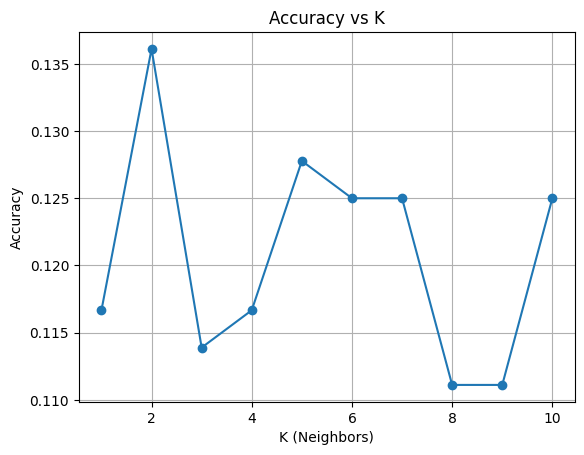

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv("C:/Users/hp5cd/Downloads/iris_extended.csv")

print("Data Types:\n", df.dtypes)

y = df.iloc[:, -1]

if y.dtype == 'float64' or y.dtype == 'int64':
    y = pd.cut(y, bins=len(np.unique(y)), labels=False)
elif y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
X = df.select_dtypes(include=[np.number]).drop(columns=[df.columns[-1]])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

k_values = range(1, 11)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K = {k} → Accuracy = {acc:.2f}")

plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs K")
plt.xlabel("K (Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracies)]
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix for K = {best_k}")
plt.show()
